### For the use of all luxpy functions used here see:
### https://github.com/ksmet1977/luxpy 
### Tutorial: https://doi.org/10.1080/15502724.2018.1518717 

# Some short evaluations for $f_{1}^{'}$ in a more general form

In [1]:
# Use some packages
import luxpy as lx
import numpy as np
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

### Demonstration code for EMPIR 19nrm02

In [2]:
from empir19nrm02 import _RES, _SPD
from empir19nrm02.f1prime import py_f1PrimeGlx
from empir19nrm02.tools import plotSelectedSPD, plotYxy, plotHist, plotCorrMatrixSamll

## Read some detector data (collection of about 120 Photometers, mainly from Bp and used for CIE S 025)
<ul>
<li><p>every entry (spectral responsibility, SPD is a row in the matrix, the first row is containing the wavelength scale)</p></li>
<li><p>For all data files in this project the first (sometimes also the second) data set(s) are used for referecne
calculations (e.g. for detectors the first one is V(Lambda) and for lightsources the first is standard illuminant A
and the second one illuminant L)</p></li>
</ul>

In [3]:
vldetectors = _RES['VLDetectors']['S']['data'].copy()

### About 120 detectors in 5nm steps (this is enough for our purpose)

In [4]:
vldetectors.shape

(128, 81)

### Two functions for the evaluation from the luxpy package

In [5]:
?lx.spectral_mismatch_and_uncertainty.f1prime

In [6]:
?lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors

### Get some statistical data from the detectors

### Get all $f_{1}^{´}$ values (standard evaluation, weighting with illuminant A, target function $V(\lambda)$)

In [7]:
f1p=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

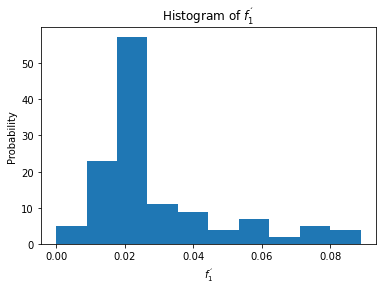

In [8]:
plotHist( f1p, xLabel='$f_{1}^{´}$', yLabel='Probability', title='Histogram of $f_{1}^{´}$', fileName='Histogram of f1Prime.png')

### Sort the detectors on their $f_{1}^{'}$ values to make the visualization easier

In [9]:
vldetectors[1:]=vldetectors[np.argsort(f1p)+1]
f1p=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

### Get all $f_{1,\mathrm{LED}}^{´}$ values (standard evaluation, weighting with illuminant LED_B3/L41, target function $V(\lambda)$)

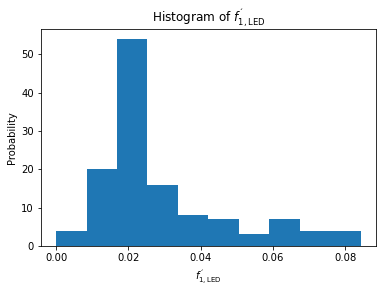

In [10]:
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
plotHist( f1pLED, xLabel='$f_{1,\mathrm{LED}}^{´}$', yLabel='Probability', title='Histogram of $f_{1,\mathrm{LED}}^{´}$', fileName='Histogram of f1PrimeLED.png')

### Let's have a look for the differences $f_{1}^{´}$-$f_{1,\mathrm{LED}}^{´}$ and  $f_{1}^{´}$-$f_{1}^{*}$ over $f_{1}^{´}$
#### BTW:  $f_{1}^{*}$ is using the weighting with Standard illuminant E (no weighting at all)

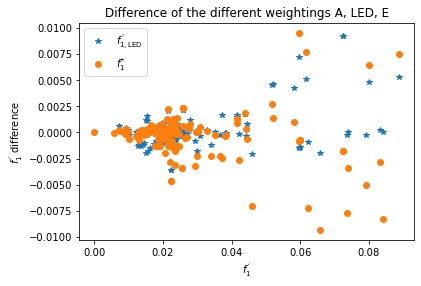

In [11]:
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='E', cieobs='1931_2', s_target_index=2)
pyplot.plot(f1p, f1p-f1pLED, '*', label='$f_{1,\mathrm{LED}}^{´}$')
pyplot.plot(f1p, f1p-f1pE, 'o', label='$f_{1}^{*}$')
pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$f_{1}^{´}$ difference')
pyplot.title('Difference of the different weightings A, LED, E')
pyplot.legend()
pyplot.savefig('Difference of the different weightings A LED E.png')

## Introduce some light source data for evaluation

### Blackbody data with different color temperatures
#### Remember: The first lightsource is Standard Illuminant A for reference

In [12]:
SPD_BB = _SPD['BB']['S']['data'].copy()
SPD_BB.shape

(56, 81)

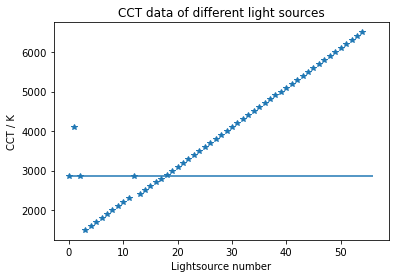

In [13]:
pyplot.plot(lx.xyz_to_cct(lx.spd_to_xyz(SPD_BB)), "*")
pyplot.xlabel('Lightsource number')
pyplot.ylabel('CCT / K')
pyplot.hlines(2856, 0, SPD_BB.shape[0])
pyplot.title('CCT data of different light sources')
pyplot.savefig('SPD_BB_CCT.png')

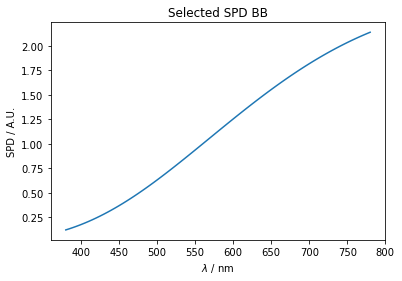

In [14]:
plotSelectedSPD( SPD_BB, 20, title='Selected SPD BB', fileName='SPD_BB_Selected.png')

### Some PT White LED Spectra (mainly from the S 025 calculations)

In [15]:
SPD_PTLED = _SPD['PTLED']['S']['data'].copy()
SPD_PTLED.shape

(230, 81)

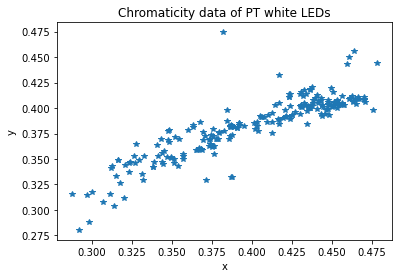

In [16]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_PTLED))
plotYxy( Yxy, title='Chromaticity data of PT white LEDs', fileName='SPD_PTLED_xy.png')

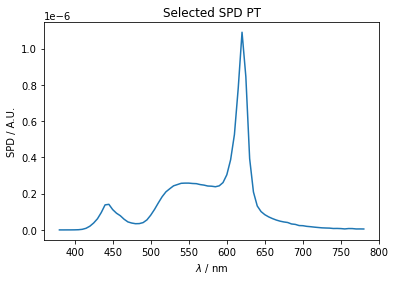

In [17]:
plotSelectedSPD( SPD_PTLED, 20, title='Selected SPD PT', fileName='SPD_PTLED_Selected.png')

### Some RGB White LED Spectra (mainly from the S 025 calculations)¶

In [18]:
SPD_RGB = _SPD['RGBLED']['S']['data'].copy()
SPD_RGB.shape

(99, 81)

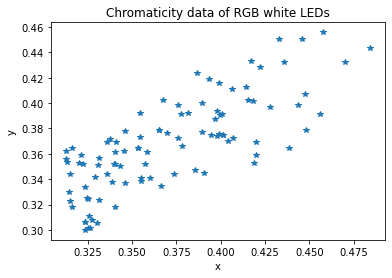

In [19]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_RGB))
plotYxy( Yxy, title='Chromaticity data of RGB white LEDs', fileName='SPD_RGB_xy.png')

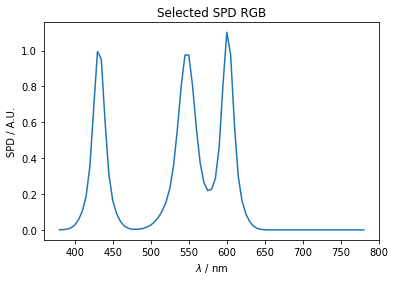

In [20]:
plotSelectedSPD( SPD_RGB, 20, title='Selected SPD RGB', fileName='SPD_RGB_Selected.png')

### White LED Spectra from the PhotoLED Project [EMPIR15SIB07](https://data.dtu.dk/articles/dataset/EMPIR_15SIB07_PhotoLED_-_Database_of_LED_product_spectra/12783389)¶

In [21]:
SPD_PhotoLED = _SPD['PHOTOLED']['S']['data'].copy()
SPD_PhotoLED.shape

(1497, 471)

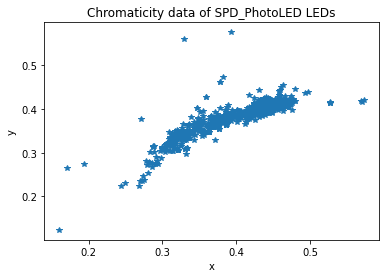

In [22]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_PhotoLED))
plotYxy( Yxy, title='Chromaticity data of SPD_PhotoLED LEDs', fileName='SPD_SPD_PhotoLEDLEDs_xy.png')

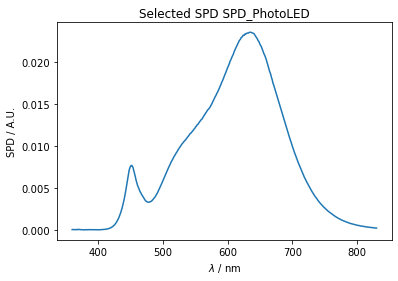

In [23]:
plotSelectedSPD( SPD_PhotoLED, 26, title='Selected SPD SPD_PhotoLED', fileName='SPD_SPD_PhotoLED_Selected.png')

### Some Monochromatic LED Spectra (not really used here - only for demonstration)¶

In [24]:
SPD_Mono = _SPD['MONOLED']['S']['data'].copy()
SPD_Mono.shape

(542, 401)

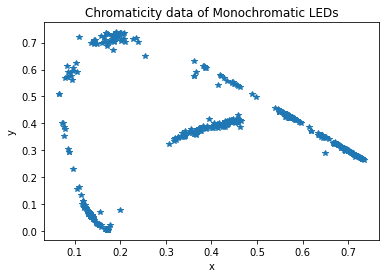

In [25]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(SPD_Mono))
plotYxy( Yxy, title='Chromaticity data of Monochromatic LEDs', fileName='SPD_MonoLEDs_xy.png')

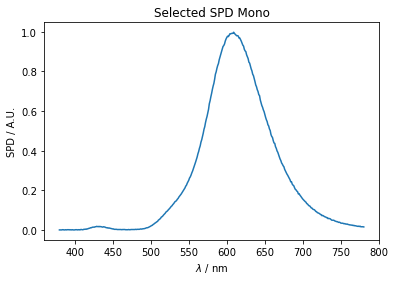

In [26]:
plotSelectedSPD( SPD_Mono, 260, title='Selected SPD Mono', fileName='SPD_Mono_Selected.png')

### Combine the spectral data (all data together to one dataset)
#### Note: the first row contains the wavelength scale and is dropped expect for the first data set.

In [27]:
spectra=np.vstack((SPD_BB, SPD_PTLED[1:], SPD_RGB[1:]))
#Without the Mono LEDs (to be handled later on)
#spectra=SPD_Mono
spectra=SPD_PhotoLED
SMCF=lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors( spectra, vldetectors, S_C='A')
SMCFLED=lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors( spectra, vldetectors, S_C='LED_B3')

In [28]:
print (spectra.shape)
print (SMCF.shape)

(1497, 471)
(1496, 127)


### The SMCF is an image now.
<ul>
<li><p>each column represents one detector</p></li>
<li><p>detectors are sorted by f1p</p></li>
<li><p>each row represents a SPD form our test set</p></li>
</ul>


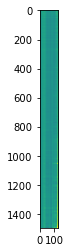

In [29]:
pyplot.imshow(SMCF, vmin=0.97, vmax=1.03)

### Image in a 3D view.

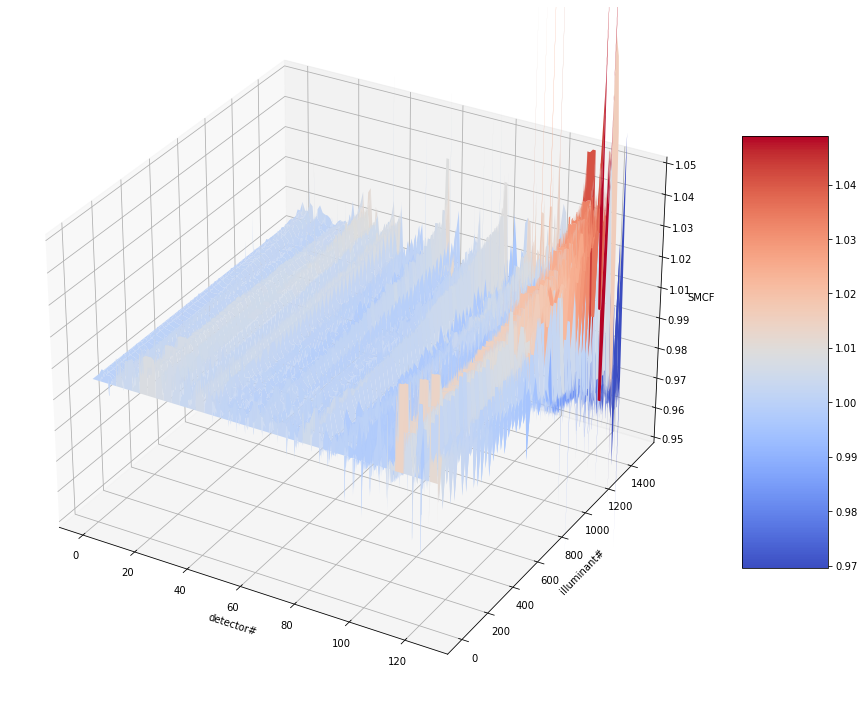

In [30]:
X = np.arange(0, vldetectors.shape[0]-1, 1)
Y = np.arange(0, spectra.shape[0]-1, 1)
X, Y = np.meshgrid(X, Y)
fig = pyplot.figure(figsize=[12, 12])
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, SMCF,cmap=cm.coolwarm)
# Customize the z axis.
ax.set_zlim(0.95, 1.05)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('detector#')
ax.set_ylabel('illuminant#')
ax.set_zlabel('SMCF')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show
pyplot.savefig('SMCF_Detector_f1Prime.png')

### Calculating all the different $f_{1}^{'}$ values.

In [31]:
dCutOff=0.01

f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
f1pA_py=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
f1pAFMin=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
f1pAFCutOffR=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=-dCutOff, dBandWidth=0.)
f1pBW20nm=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)
f1pEval = np.vstack(( f1pA, f1pE, f1pLED, f1pAFMin, f1pAFCutOffR, f1pBW20nm))

### Calculating the correlation between all the different $f_{1}^{'}$ values

In [32]:
f1pEvalCorr = np.corrcoef(f1pEval)

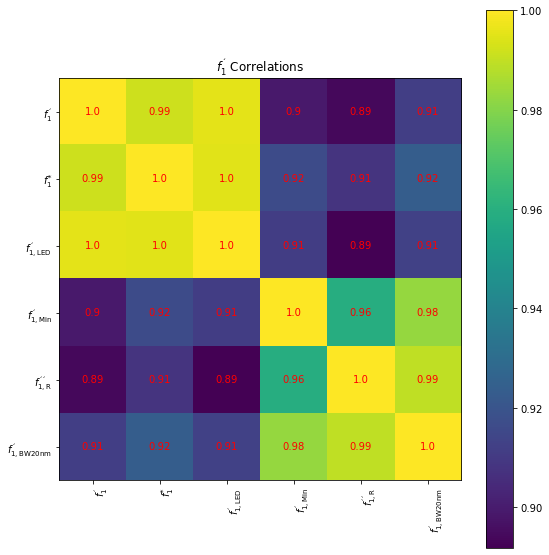

In [33]:
x_label_list = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$', '$f_{1,\mathrm{Min}}^{´}$', '$f_{1,\mathrm{R}}^{´´}$', '$f_{1,\mathrm{BW20nm}}^{´}$']
plotCorrMatrixSamll(f1pEvalCorr, x_label_list, title='$f_{1}^{´}$ Correlations', fileName='f1p Correlations.png', with_values=True)

#### Calibrating with Standard Illuminant A the SMCF for Standard Illuminant A should be 1 for all detectors
#### Calibrating with Illuminant L the SMCF for Illuminant L should be 1 for all detectors, too.

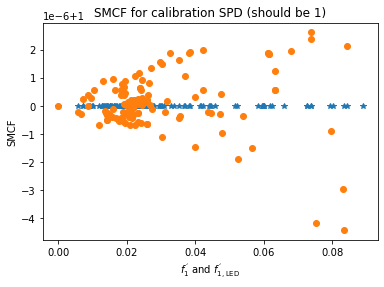

In [34]:
# 0 Illuminant A
# 1 Illuminant LED
pyplot.plot(f1pA, SMCF[0,:], '*')
pyplot.plot(f1pLED, SMCFLED[1,:], 'o')
pyplot.xlabel('$f_{1}^{´}$ and $f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('SMCF')
pyplot.title('SMCF for calibration SPD (should be 1)')
pyplot.savefig('calibation check.png')


#### Calibrating with Standard Illuminant A the SMCF for Illuminant L should be different from 1
#### Calibrating with Illuminant L the SMCF for Standard Illuminant A should be different from 1, too.

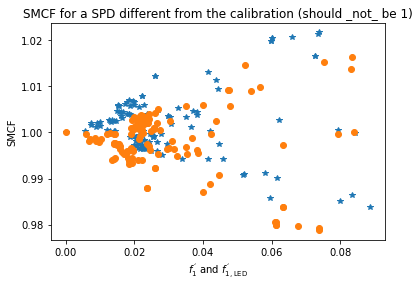

In [35]:
# 0 Illuminant A
# 1 Illuminant LED
# Attention: Here the LED is used for the calibration with A and vice versa
pyplot.plot(f1pA, SMCF[1,:], '*')
pyplot.plot(f1pLED, SMCFLED[0,:], 'o')
pyplot.xlabel('$f_{1}^{´}$ and $f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('SMCF')
pyplot.title('SMCF for a SPD different from the calibration (should _not_ be 1)')
pyplot.savefig('check A LED reverse.png')


#### Calculating the mean SMCF for all lightsources (calibration Standard Illuminant A)

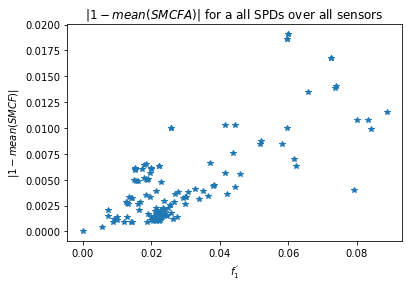

In [36]:
meanA0=np.mean(abs(SMCF-1), axis=0)
pyplot.plot(f1pA, meanA0, '*')

pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$|1-mean(SMCF)|$')
pyplot.title('$|1-mean(SMCFA)|$ for a all SPDs over all sensors')
pyplot.savefig('f1Prime_mean_SMCFA.png')

#### Calculating the standard deviation of the  SMCF for all lightsources (calibration Standard Illuminant A)

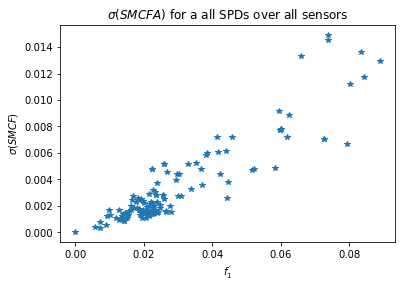

In [37]:
stdA0=np.std(SMCF, axis=0)
pyplot.plot(f1pA, stdA0, '*')

pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('$\sigma(SMCFA)$ for a all SPDs over all sensors')
pyplot.savefig('f1Prime_sigma_SMCFA.png')

#### Calculating the mean SMCF for all lightsources (calibration  Illuminant L)

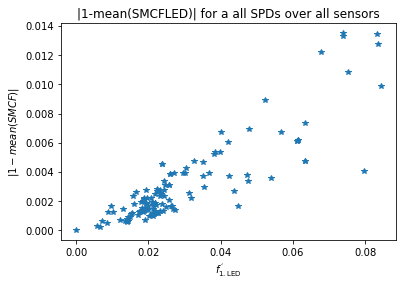

In [38]:
meanLED=np.mean(abs(SMCFLED-1), axis=0)
pyplot.plot(f1pLED, meanLED, '*')

pyplot.xlabel('$f_{1.\mathrm{LED}}^{´}$')
pyplot.ylabel('$|1-mean(SMCF)|$')
pyplot.title('|1-mean(SMCFLED)| for a all SPDs over all sensors')
pyplot.savefig('f1Prime_mean_SMCFLED.png')

#### Calculating the standard deviation of the  SMCF for all lightsources (calibration Illuminant L)

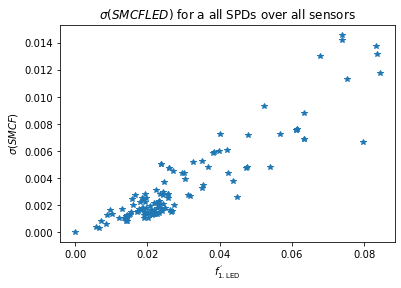

In [39]:
stdLED=np.std(SMCFLED, axis=0)
pyplot.plot(f1pLED, stdLED, '*')

pyplot.xlabel('$f_{1.\mathrm{LED}}^{´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('$\sigma(SMCFLED)$ for a all SPDs over all sensors')
pyplot.savefig('f1Prime_sigma_SMCFLED.png')

# Correlation
#### Let's have a look at all correlations (between all the characteristics calculated before)

In [40]:
f1pEval2 = np.vstack(( f1pA, f1pE, f1pLED, f1pAFMin, f1pAFCutOffR, f1pBW20nm, meanA0, stdA0, meanLED, stdLED))
f1pEvalCorr2 = np.corrcoef(f1pEval2)
x_label_list = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$', '$f_{1,\mathrm{Min}}^{´}$', '$f_{1,\mathrm{R}}^{´´}$', '$f_{1,\mathrm{BW20nm}}^{´}$', \
               'SMCFA', '$\sigma(SMCFA)$', 'SMCFLED', '$\sigma(SMCFLED)$']

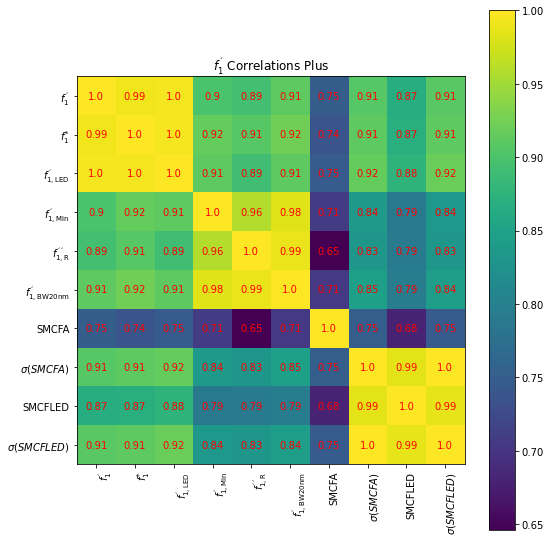

In [41]:
plotCorrMatrixSamll(f1pEvalCorr2, x_label_list, title='$f_{1}^{´}$ Correlations Plus', fileName='f1p Correlations2.png', with_values=True)

# Sensitivity investigations
#### Noise at different wavelength positions (influence of the weighting function)

(83, 81)

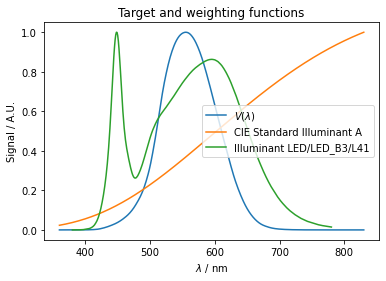

In [42]:
pyplot.plot(lx._CMF['1931_2']['bar'][0], lx._CMF['1931_2']['bar'][2], label='$V(\lambda)$')
pyplot.plot(lx._CIE_ILLUMINANTS['A'][0], lx._CIE_ILLUMINANTS['A'][1]/np.max(lx._CIE_ILLUMINANTS['A'][1]), label='CIE Standard Illuminant A')
pyplot.plot(lx._CIE_ILLUMINANTS['LED_B3'][0], lx._CIE_ILLUMINANTS['LED_B3'][1]/np.max(lx._CIE_ILLUMINANTS['LED_B3'][1]), label='Illuminant LED/LED_B3/L41')

pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('Signal / A.U.')
pyplot.title('Target and weighting functions')
pyplot.legend()
pyplot.savefig('Target and weighting.png')

VLDetectorNoise = _RES['VLSimNoise']['S']['data'].copy()
VLDetectorNoise.shape

In [43]:
f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
f1pA_py=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
f1pAFMin=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
f1pAFCutOffR=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=-dCutOff, dBandWidth=0.)
f1pBW20nm=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)

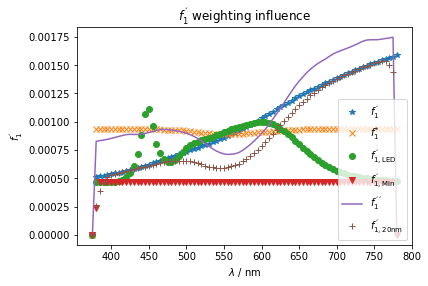

In [44]:
xRange = np.arange(375,780+1,5)
pyplot.plot(xRange, f1pA, '*', label='$f_{1}^{´}$')
pyplot.plot(xRange, f1pE, 'x', label='$f_{1}^{*}$')
pyplot.plot(xRange, f1pLED, 'o', label='$f_{1,\mathrm{LED}}^{´}$')
#pyplot.plot(xRange, f1pA-f1pA_py, 'ro', label='$f_{1,\mathrm{lx}}^{´}-f_{1,\mathrm{py}}^{´}$')
pyplot.plot(xRange, f1pAFMin, 'v', label='$f_{1,\mathrm{Min}}^{´}$')
pyplot.plot(xRange, f1pAFCutOffR, '-', label='$f_{1}^{´´}$')
pyplot.plot(xRange, f1pBW20nm, '+', label='$f_{1,\mathrm{20nm}}^{´}$')

pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('$f_{1}^{´}$')
pyplot.title('$f_{1}^{´}$ weighting influence')
pyplot.legend()
pyplot.savefig('weighting influence.png')

#### Influence of the wavelength shift to the detector characteristics

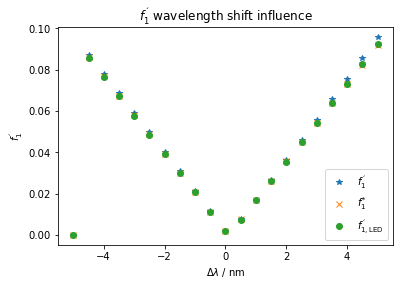

In [45]:
VLDetectorShift = _RES['VLSimShift']['S']['data'].copy()

f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='LED_B3', cieobs='1931_2', s_target_index=2)

xRange = np.arange(-5,5+0.2,0.1)
subPlot = 5
pyplot.plot(xRange[::subPlot], f1pA[::subPlot], '*', label='$f_{1}^{´}$')
pyplot.plot(xRange[::subPlot], f1pE[::subPlot], 'x', label='$f_{1}^{*}$')
pyplot.plot(xRange[::subPlot], f1pLED[::subPlot], 'o', label='$f_{1,\mathrm{LED}}^{´}$')

pyplot.xlabel('$\Delta\lambda$ / nm')
pyplot.ylabel('$f_{1}^{´}$')
pyplot.title('$f_{1}^{´}$ wavelength shift influence')
pyplot.legend()
pyplot.savefig('f1Prime_Sens_WLShift.png')

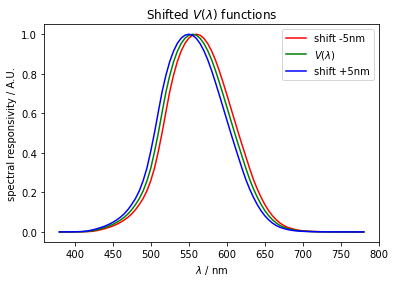

In [46]:
VLDetectorNumber = VLDetectorShift.shape[0]
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[2,:], 'r-', label='shift -5nm')
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[int((VLDetectorNumber-1)/2),:], 'g-', label='$V(\lambda)$')
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[VLDetectorNumber-1,:], 'b-', label='shift +5nm')
pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('spectral responsivity / A.U.')
pyplot.title('Shifted $V(\lambda$) functions')
pyplot.legend()
pyplot.savefig('VLShifts.png')
    

# Ende Gelände